In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dataset import XinguDataset
from onehotencoding import OneHotEncoding

In [2]:
# getting Fold 1 dataset info
train_regions = [1, 2, 5, 6, 7, 8, 9, 10]
test_regions = [3, 4]
encoder = OneHotEncoding(2)
train_ds = XinguDataset('./scenes_allbands',
                                './truth_masks',
                                encoder,
                                range(1,4),
                                train_regions,
                                256,
                                64,
                                transforms=True)
test_ds = XinguDataset('./scenes_allbands',
                               './truth_masks', encoder,
                               range(1,4), test_regions,
                               256, 64)

In [3]:
print(f'Train ds: {len(train_ds)}')
print(f'Test ds: {len(test_ds)}')

Train ds: 10728
Test ds: 234


In [27]:
encoder = OneHotEncoding(2)
ds_no_aug = XinguDataset('scenes_allbands_ndvi', 'truth_masks', encoder, [8], range(1, 11), 256, 256)
ds_aug = XinguDataset('scenes_allbands_ndvi', 'truth_masks', encoder, [8], range(1, 11), 256, 256, True)

In [28]:
print(f'ds_no_aug: {len(ds_no_aug)} samples')
print(f'ds_aug: {len(ds_aug)} samples')

ds_no_aug: 124 samples
ds_aug: 992 samples


In [29]:
image, mask = ds_aug.__getitem__(11)
# mask = encoder.decode(mask)
print(f'mask shape: {mask.shape}')

mask shape: (1, 256, 256)


In [30]:
ch = image.shape[0]
for channel in range(ch):
    # normalize each band
    image[channel] = (image[channel] - image[channel].min()) / (image[channel].max() - image[channel].min())

In [31]:
np.unique(image)

array([0.        , 0.0010813 , 0.00375752, ..., 0.9882451 , 0.9907382 ,
       1.        ], dtype=float32)

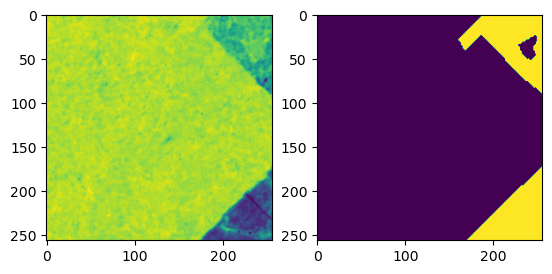

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask.squeeze())

In [16]:
image, mask = ds_no_aug.__getitem__(8)
mask = encoder.decode(mask)
print(f'mask shape: {mask.shape}')

mask shape: (256, 256)


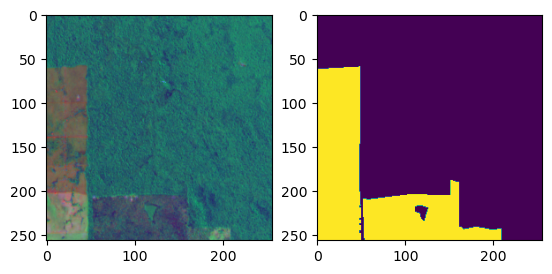

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image.transpose(1, 2, 0))
ax[1].imshow(mask)